In [1]:
# Center data
# x_train_mean = np.mean(X_train, axis=0)
# X_train_normalized = X_train - x_train_mean
#y_train_mean = np.mean(y_train)
#y_train_normalized = y_train - y_train_mean

#from sklearn.preprocessing import StandardScaler
#Standardize data
#scaler = StandardScaler()
#X_train_standardized = scaler.fit_transform(X_train)

#beta_ridge = np.matmul(np.matmul(inv(np.matmul(X_train.transpose,X_train)),X_train.transpose),y_train)

In [2]:
### 1. Use Lasso
### 2. Do least squares. 
###    Find mean squared errors for each prediction. 
###    Remove the appx. 25% that are outliers (using a histogram or the MAD-median rule). 
###    Do Ridge to handle noise.

### The choice of 1 or 2 depends on whether some of the variables don't contribute significantly or not. If they don't we should do 1,
### (but what about outliers then? Should we do as in 2, but then do Lasso in the end and not Ridge?).

### We could try the different approaches and chose the one with the smalles error.

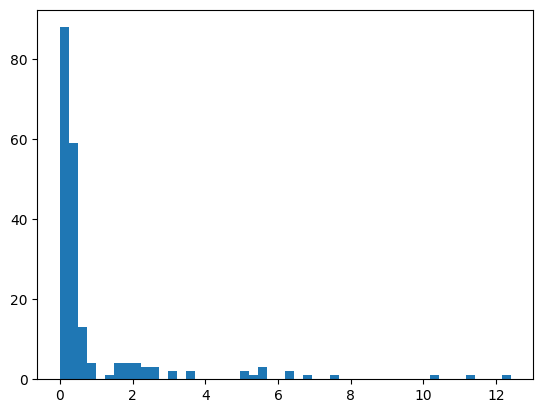

In [3]:
import numpy as np
from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
X_train = np.load('X_train.npy')
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
ones = np.ones((200,1))
#X = np.hstack((ones,X_train))

# Standardize data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
y_train_standardized = scaler.fit_transform(y_train.reshape(-1, 1))
y_train_standardized = y_train_standardized.ravel()

# Add column of ones for the intercept
X_standardized = np.hstack((ones,X_train_standardized))

# Perform a least square fit
beta_LS = np.matmul(np.matmul(inv(np.matmul(X_standardized.transpose(),X_standardized)),X_standardized.transpose()),y_train_standardized)

# Predict using the linear model
y_hat_LS = np.matmul(X_standardized,beta_LS)

# Find squared errors
e = (y_train_standardized-y_hat_LS)

plt.hist(e**2, bins=50)
plt.show()

In [39]:
print(np.mean(X_train, axis=0))
print(np.mean(X_test, axis=0))

[153.78004878  90.93994589 186.96945592 146.01920917 136.23808272]
[153.78004878  90.93994589 186.96945592 146.01920917 136.23808272]


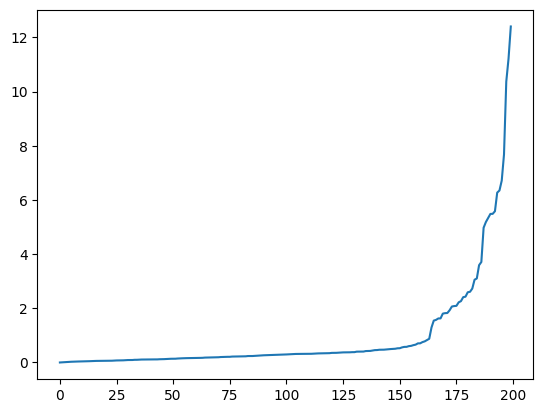

In [35]:
plt.plot(np.sort(e**2))
plt.show()